# Assignment04 ----- Brendan Dasilva
### Working with CIFAR10 DATA

## 1. Importing Libraries

Importing the necessary libraries for building and training deep learning models using TensorFlow and Keras. We'll also use NumPy for numerical operations and Matplotlib for graphing results.

In [ ]:
# Import core libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Load CIFAR-10 dataset directly from Keras datasets
from tensorflow.keras.datasets import cifar10

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

## 2. Loading and Preparing the CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 32x32 color images across 10 categories. This dataset is built into Keras, making it easy to load. We normalize the pixel values and convert the class labels to one-hot encoded vectors.

The data is split into:
- Training set
- Validation set (10% of the training set)
- Test set


In [ ]:
# Load CIFAR-10 dataset (60,000 images, 10 categories)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to a 0-1 range (important preprocessing step)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded format (10 categories)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split 10% of the training data into a validation set
# This gives us training, validation, and test splits as required
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## 3. Baseline CNN Model (Overparameterized)

This model is intentionally built with too many filters and dense neurons, leading to overparameterization. This allows us to demonstrate overfitting — where the model performs well on training data but poorly on validation data.

In [ ]:
# Define a CNN model with excessive parameters (overparameterized)
# This is used to intentionally show overfitting

def build_model():
    model = models.Sequential([
        # Convolution layers with many filters
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten and dense layers with large size
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])

    # Compile the model with categorical crossentropy and accuracy metric
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the model and print its architecture
model = build_model()
model.summary()  # View number of parameters and layer structure

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904,202 (7.26 MB)

 Trainable params: 1,904,202 (7.26 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Baseline Model

We train the overparameterized CNN for 20 epochs and evaluate its accuracy and loss on both the training and validation sets. This highlights the overfitting issue, where the model generalizes poorly to unseen data.

In [ ]:
# Train the model for 20 epochs to observe overfitting
# We should see training accuracy increase while validation accuracy plateaus or drops
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_val, y_val),
    batch_size=64  # Reasonable batch size for CIFAR10
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3822 - loss: 1.6814 - val_accuracy: 0.5954 - val_loss: 1.1320
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6416 - loss: 1.0196 - val_accuracy: 0.6754 - val_loss: 0.9238
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7257 - loss: 0.7837 - val_accuracy: 0.7236 - val_loss: 0.7859
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7848 - loss: 0.6203 - val_accuracy: 0.7404 - val_loss: 0.7655
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8334 - loss: 0.4808 - val_accuracy: 0.7594 - val_loss: 0.7261
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8741 - loss: 0.3558 - val_accuracy: 0.7626 - val_loss: 0.7266
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9050 - loss: 0.2636 - val_accuracy: 0.7676 - val_loss: 0.7840
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9419 - loss: 0.1700 - val_accurac

## 5. Plotting Accuracy and Loss (Baseline Model)

We visualize the training and validation accuracy and loss curves. This helps us clearly observe the overfitting — where training accuracy continues to rise, but validation accuracy plateaus or declines.

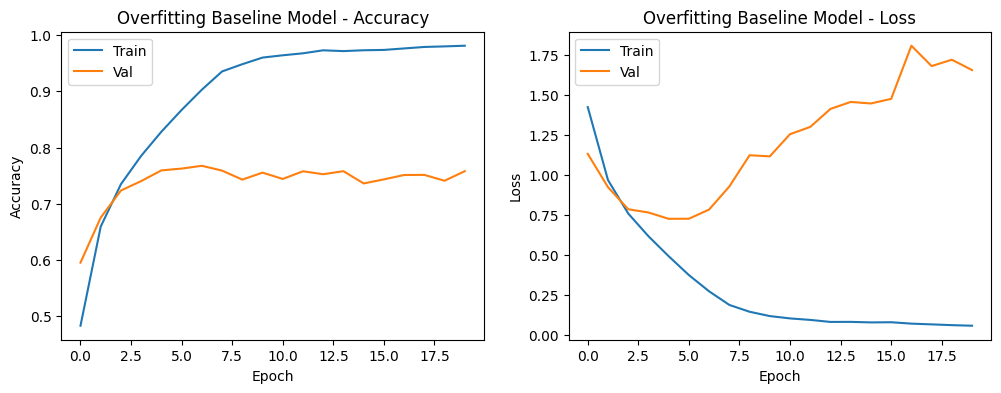

In [ ]:
# Define a function to plot accuracy and loss graphs
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Show plots for overfitting model
plot_history(history, "Overfitting Baseline Model")

## 6. Regularized Model (Dropout + L2)

To reduce overfitting, we apply two regularization techniques:
- **Dropout:** Randomly disables neurons during training to prevent over-reliance.
- **L2 Regularization:** Penalizes large weight values, encouraging simpler models.

In [ ]:
# Define a regularized CNN model to help reduce overfitting
# We add Dropout layers and L2 regularization to the dense and convolution layers

def build_regularized_model():
    model = models.Sequential([
        # First convolution block with L2 regularization
        layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),  # Dropout to randomly turn off 30% of neurons

        # Second convolution block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.4),  # Increased dropout rate for deeper layer

        # Flatten and dense layers with more dropout
        layers.Flatten(),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),  # Dropout before final layer
        layers.Dense(10, activation='softmax')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the new model with regularization
reg_model = build_regularized_model()
reg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,360,138 (9.00 MB)

 Trainable params: 2,360,138 (9.00 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Training the Regularized Model

We retrain the modified model with the same data and number of epochs. We expect to see better generalization, meaning training and validation performance stay more aligned.

In [ ]:
# Train the regularized model for the same number of epochs (20)
# This allows for a fair comparison with the baseline model

reg_history = reg_model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_val, y_val),
    batch_size=64
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.2797 - loss: 2.1919 - val_accuracy: 0.4468 - val_loss: 1.6482
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4832 - loss: 1.6005 - val_accuracy: 0.5750 - val_loss: 1.3850
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5402 - loss: 1.4899 - val_accuracy: 0.6016 - val_loss: 1.3228
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5776 - loss: 1.4109 - val_accuracy: 0.6290 - val_loss: 1.2754
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6046 - loss: 1.3527 - val_accuracy: 0.6552 - val_loss: 1.2213
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6278 - loss: 1.3089 - val_accuracy: 0.6716 - val_loss: 1.1730
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6476 - loss: 1.2595 - val_accuracy: 0.6962 - val_loss: 1.1261
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6538 - loss: 1.2541 - val

## 8. Plotting Accuracy and Loss (Regularized Model)

We generate another pair of plots to compare with the baseline model. These show how regularization improves validation performance and helps reduce overfitting.


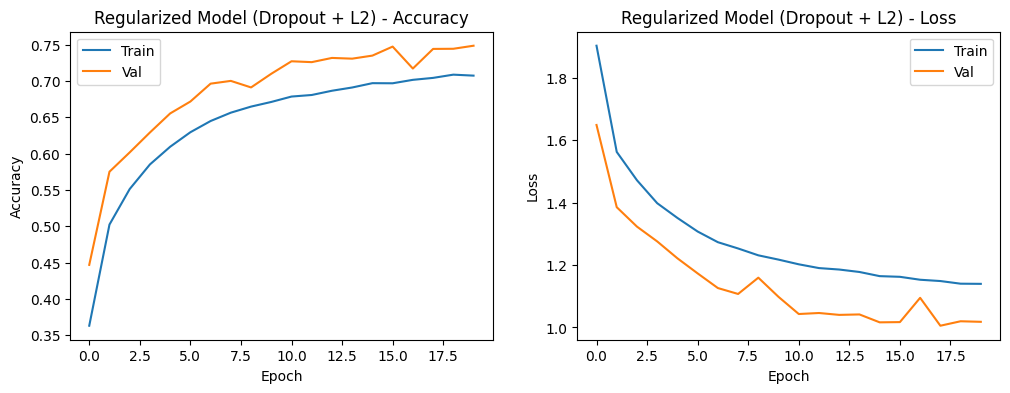

In [ ]:
# Plot training and validation accuracy/loss for the regularized model

plot_history(reg_history, "Regularized Model (Dropout + L2)")